In [1]:
!python3 -m pip install --upgrade --quiet google-genai

In [1]:
!gcloud storage cp gs://qwiklabs-gcp-04-7b2240875fdb-bucket/empty-bowl-on-empty-table.png .
!gcloud storage cp gs://qwiklabs-gcp-04-7b2240875fdb-bucket/image_editing_utils.py .
!gcloud storage cp gs://qwiklabs-gcp-04-7b2240875fdb-bucket/place-setting-mask.png .

Copying gs://qwiklabs-gcp-04-7b2240875fdb-bucket/empty-bowl-on-empty-table.png to file://./empty-bowl-on-empty-table.png
  Completed files 1/1 | 1.4MiB/1.4MiB                                          

Average throughput: 136.1MiB/s
Copying gs://qwiklabs-gcp-04-7b2240875fdb-bucket/image_editing_utils.py to file://./image_editing_utils.py
  Completed files 1/1 | 5.0kiB/5.0kiB                                          
Copying gs://qwiklabs-gcp-04-7b2240875fdb-bucket/place-setting-mask.png to file://./place-setting-mask.png
  Completed files 1/1 | 4.5kiB/4.5kiB                                          


In [2]:
from google import genai
from google.genai.types import (
    Image,
    EditImageConfig,
    RawReferenceImage,
    MaskReferenceImage,
    MaskReferenceConfig,
)

import image_editing_utils

In [3]:
PROJECT_ID = "qwiklabs-gcp-04-7b2240875fdb"
LOCATION = "us-central1"
gcs_bucket = "qwiklabs-gcp-04-7b2240875fdb-bucket"

client = genai.Client(
    vertexai=True,
    project=PROJECT_ID,
    location=LOCATION
)

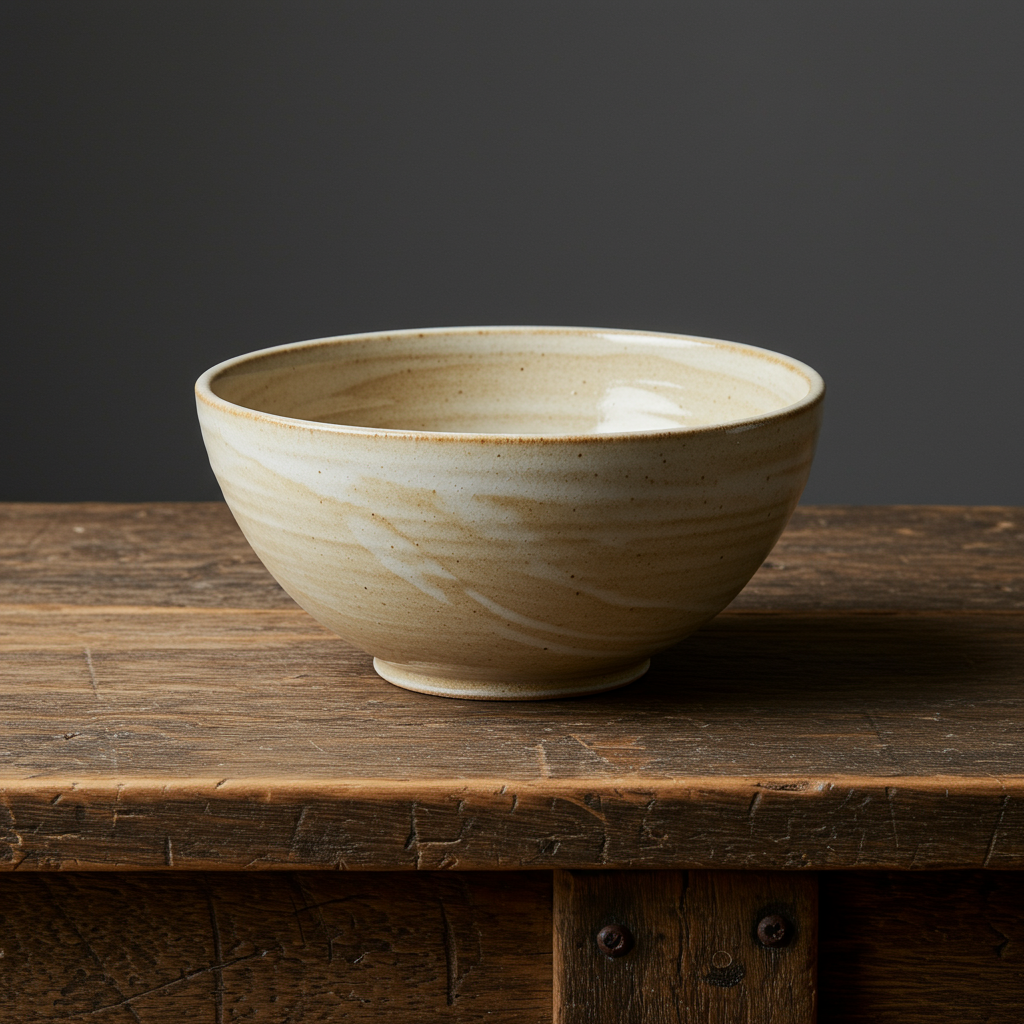

In [4]:
original_image = Image.from_file(
    location="empty-bowl-on-empty-table.png",
    mime_type="image/png"
)
original_image.show()

In [5]:
dest_filename = "empty-bowl-on-empty-table-copy.png"
original_image.save(dest_filename)
image_editing_utils.upload_file_to_gcs(
    gcs_bucket, dest_filename, dest_filename)

File empty-bowl-on-empty-table-copy.png uploaded to empty-bowl-on-empty-table-copy.png.


In [6]:
edit_model_name = "imagen-3.0-capability-001"

In [7]:
target_image_size = (1408, 768)

reframed_image, reframed_mask = image_editing_utils.pad_and_mask_image(
    original_image=original_image,
    target_size=target_image_size,
    vertical_offset_from_bottom=0.5,
    horizontal_offset_from_left=0.1,
)

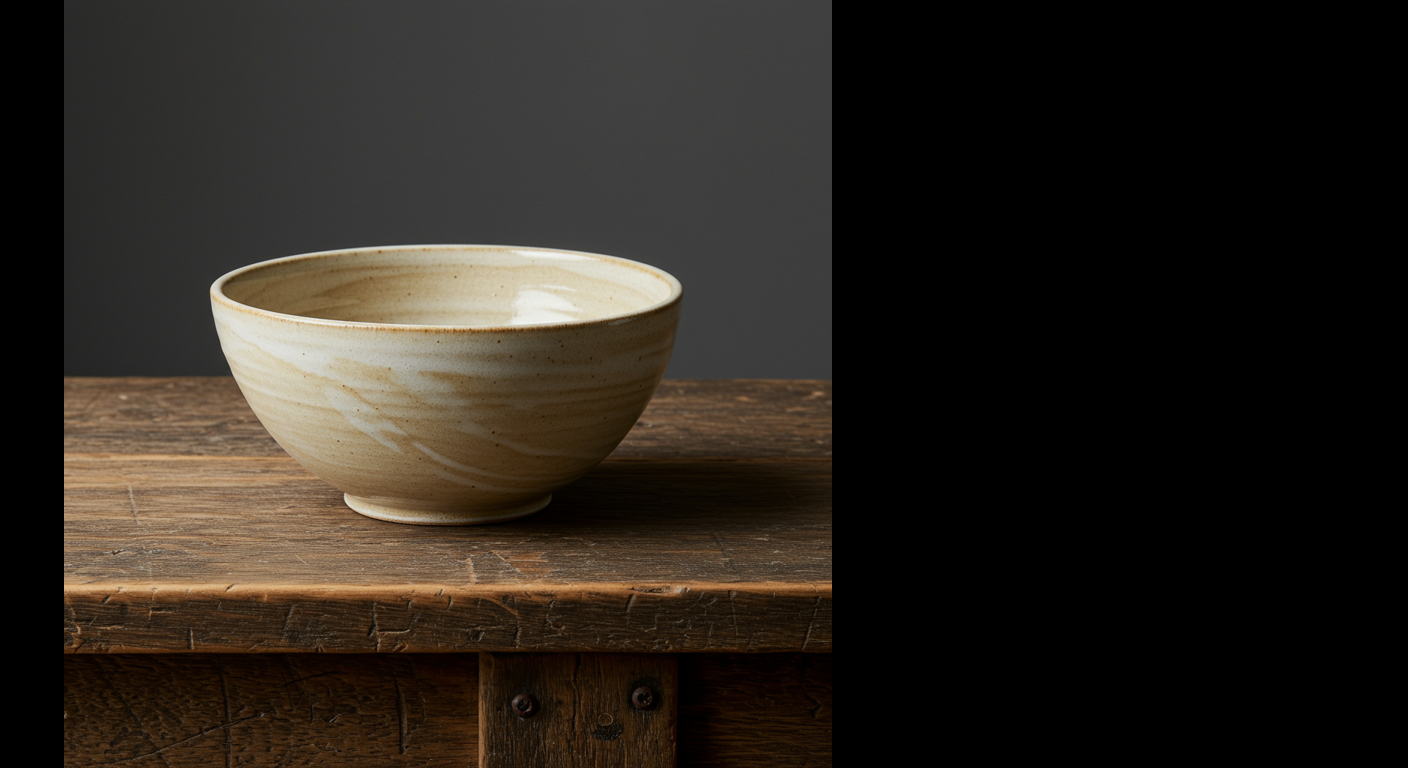

In [8]:
reframed_image.show()

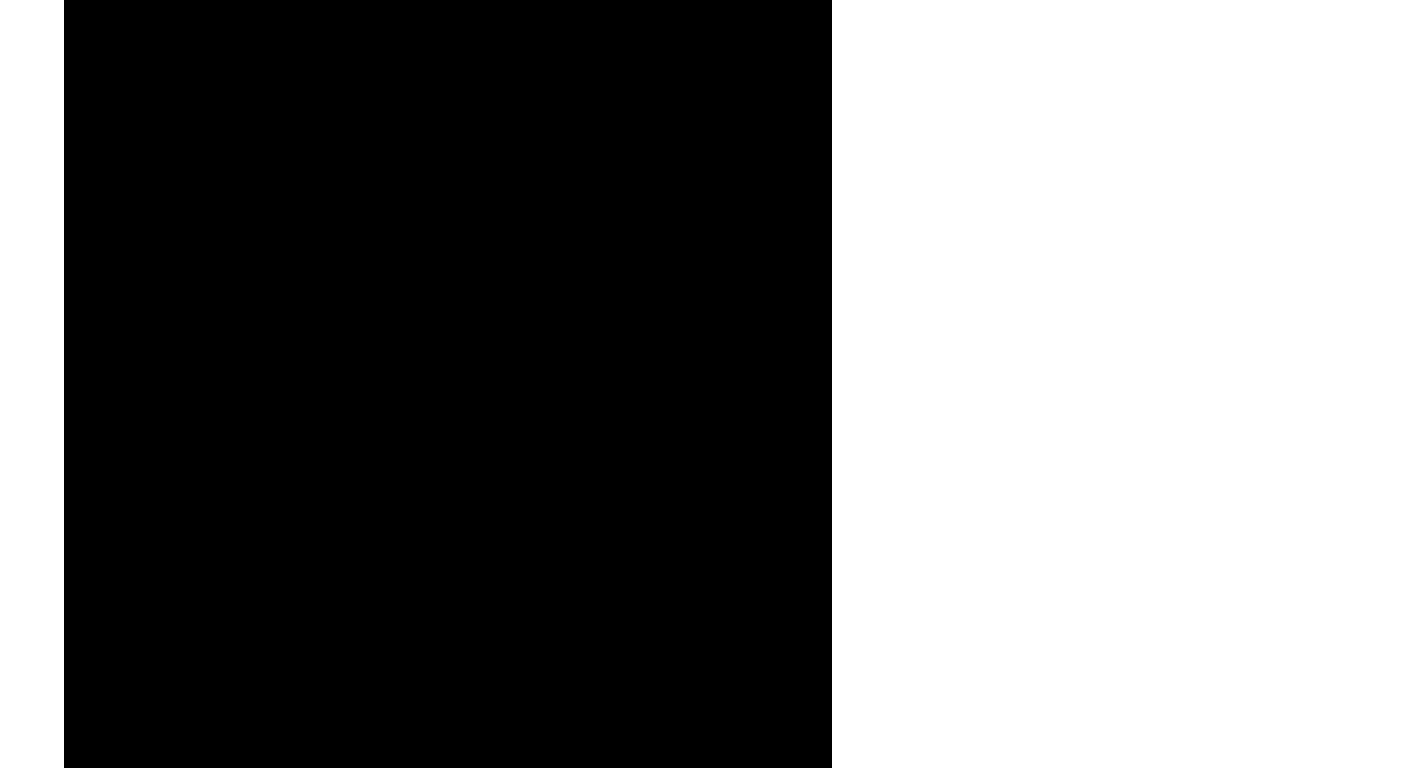

In [9]:
reframed_mask.show()

In [12]:
raw_ref_image = RawReferenceImage(
    # Fill in the appropriate configuration
)

mask_ref_image = MaskReferenceImage(
    # Fill in the appropriate configuration
)

In [14]:
outpainted_image = client.models.edit_image(
    model=edit_model_name,
    prompt="",
    reference_images=[raw_ref_image, mask_ref_image],
    config=EditImageConfig(
        edit_mode= "EDIT_MODE_OUTPAINT" ,
        number_of_images=1,
        base_steps=35,
        safety_filter_level="BLOCK_ONLY_HIGH",
    ),
)

outpainted_image.generated_images[0].image.show()

/opt/conda/lib/python3.10/site-packages/google/genai/_common.py:474: UserWarning: Imagen-3.0-capability-001 is not a valid EditMode
  warnings.warn(f"{value} is not a valid {cls.__name__}")


ClientError: 400 INVALID_ARGUMENT. {'error': {'code': 400, 'message': 'Reference image should have image field.', 'status': 'INVALID_ARGUMENT'}}